In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [2]:


# Load labeled data
df = pd.read_csv("labeled_household_investments.csv")

# Split into features and label
X = df.drop("investment_label", axis=1)
y = df["investment_label"]

In [3]:


# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [5]:

# Neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)


c:\Users\franc\Downloads\ronny\.venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8107 - loss: 0.5341 - val_accuracy: 0.9219 - val_loss: 0.2160
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9143 - loss: 0.2304 - val_accuracy: 0.9568 - val_loss: 0.1268
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9393 - loss: 0.1636 - val_accuracy: 0.9632 - val_loss: 0.0989
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9497 - loss: 0.1347 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9570 - loss: 0.1214 - val_accuracy: 0.9733 - val_loss: 0.0760
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9619 - loss: 0.1015 - val_accuracy: 0.9733 - val_loss: 0.0647
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9685 - loss: 0.0913 - val_accuracy: 0.9761 - val_loss: 0.0642
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9653 - loss: 0.0901 - val_accuracy: 0.

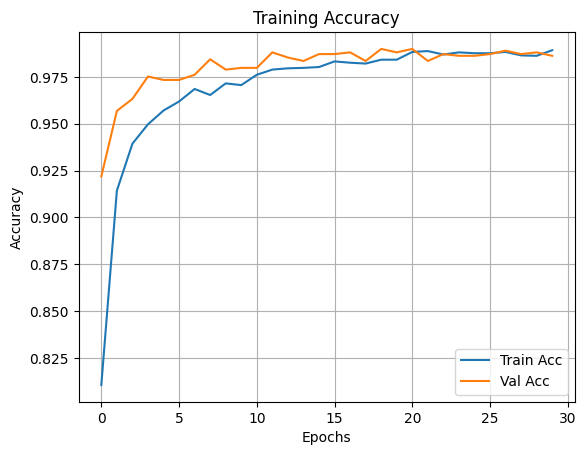

In [6]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [7]:
from tensorflow.keras.models import load_model

# After training:
model.save("investment_model.h5")  # Save model to disk


In [9]:
import joblib
# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']